In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Acer\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [4]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
#Load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
column_names = train_data.columns
for column in column_names:
    print(column + ' - ' + str(train_data[column].isnull().sum()))

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


In [11]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Text(0, 0.5, 'Jumlah Penumpang')

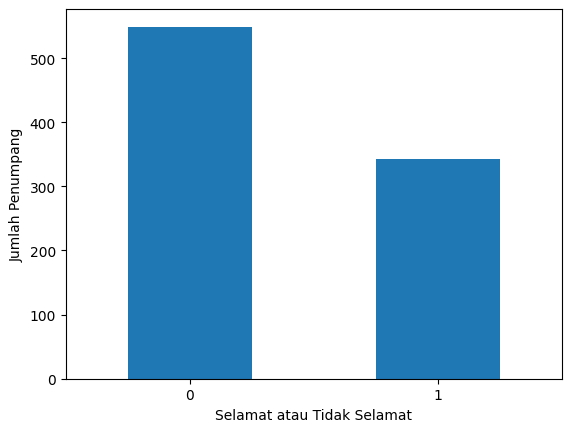

In [12]:
dt = train_data['Survived'].value_counts()
plt = dt.plot(kind = 'bar', rot=0)
plt.set_xlabel('Selamat atau Tidak Selamat')
plt.set_ylabel('Jumlah Penumpang')

Text(0, 0.5, 'Probabilitas Selamat')

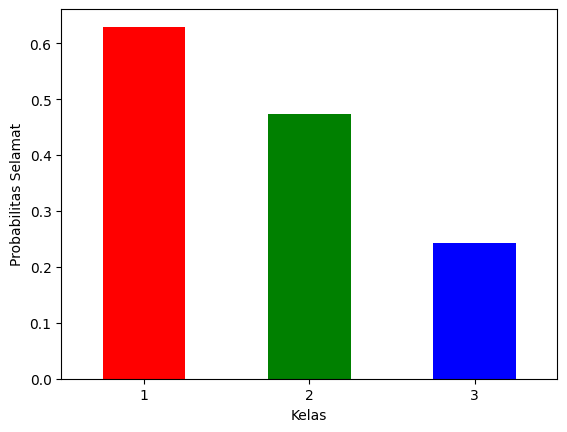

In [14]:
dt = train_data[['Pclass', 'Survived']].groupby('Pclass').mean().Survived
plt = dt.plot(kind='bar', rot=0, color=['red', 'green', 'blue'])
plt.set_xlabel('Kelas')
plt.set_ylabel('Probabilitas Selamat')

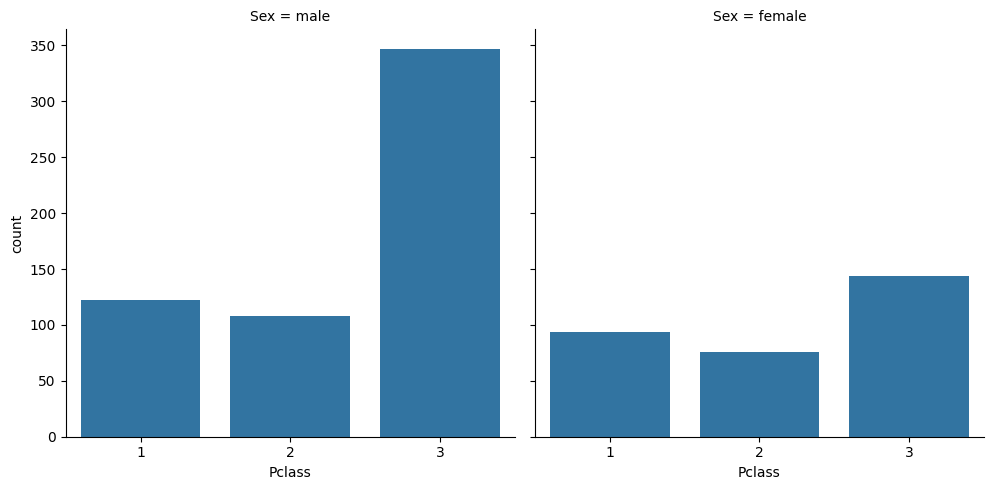

In [16]:
sns.catplot(x = 'Pclass', col = 'Sex', data = train_data, kind = 'count')

In [19]:
train_data = train_data.drop(columns=['Ticket', 'PassengerId', 'Cabin'])
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [20]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [21]:
train_data['Sex'] = train_data['Sex'].map({'male':0, 'female':1})
train_data['Embarked'] = train_data['Embarked'].map({'C':0, 'Q':1, "S":2})
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2.0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0.0,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2.0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2.0,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2.0,1


In [22]:
train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train_data = train_data.drop(columns='Name')
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,Mr
1,1,1,1,38.0,1,0,71.2833,0.0,2,Mrs
2,1,3,1,26.0,0,0,7.9250,2.0,1,Miss
3,1,1,1,35.0,1,0,53.1000,2.0,2,Mrs
4,0,3,0,35.0,0,0,8.0500,2.0,1,Mr


<Axes: xlabel='Title'>

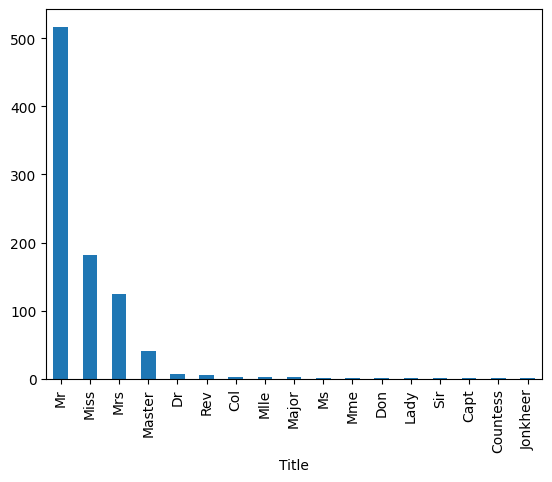

In [26]:
train_data['Title'].value_counts().plot(kind='bar')

In [29]:
train_data['Title'] = train_data['Title'].replace(
    ['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')

Text(0, 0.5, 'Jumlah Penumpang')

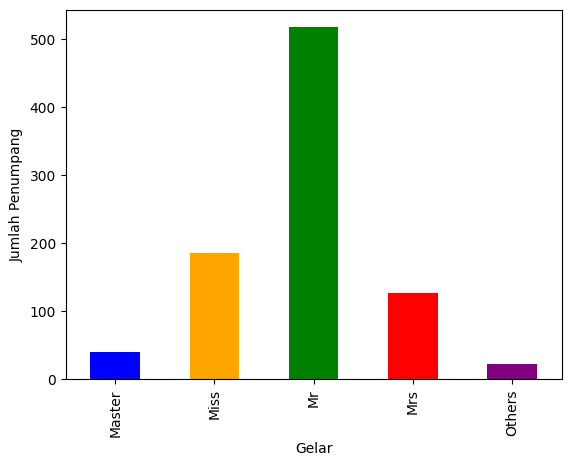

In [30]:
plt = train_data['Title'].value_counts().sort_index().plot(
    kind='bar', color=['blue', 'orange', 'green', 'red', 'purple'])
plt.set_xlabel('Gelar')
plt.set_ylabel('Jumlah Penumpang')

In [31]:
num = train_data.select_dtypes(include = [np.number])
corr_matrix = num.corr()

<Axes: >

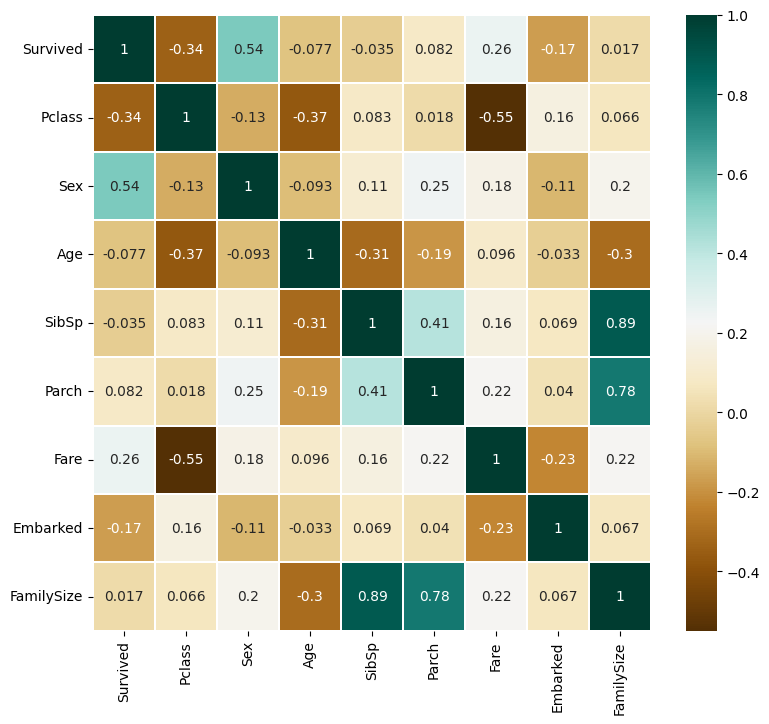

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize = (9, 8))
sns.heatmap(data = corr_matrix, cmap = "BrBG", annot = True, linewidths = 0.2)

In [34]:
missing = train_data['Embarked'].isnull().sum()
print("Jumlah data kosong pada atribut Embarked: ",missing)

Jumlah data kosong pada atribut Embarked:  2


Text(0, 0.5, 'Jumlah Penumpang')

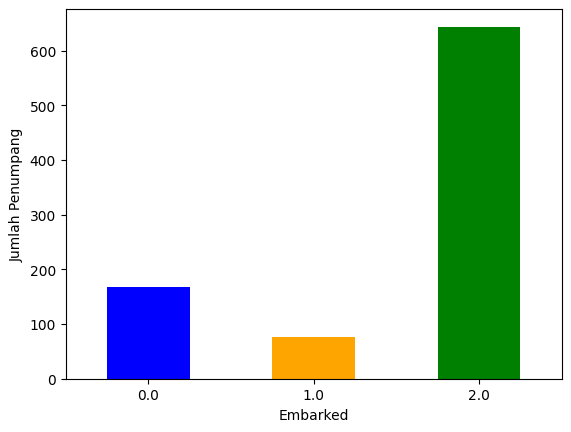

In [35]:
plt = train_data['Embarked'].value_counts().sort_index().plot(
    kind='bar', color=['blue', 'orange', 'green'], rot=0)
plt.set_xlabel('Embarked')
plt.set_ylabel('Jumlah Penumpang')

In [36]:
train_data['Embarked'] = train_data['Embarked'].fillna(2)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,Mr
1,1,1,1,38.0,1,0,71.2833,0.0,2,Mrs
2,1,3,1,26.0,0,0,7.9250,2.0,1,Miss
3,1,1,1,35.0,1,0,53.1000,2.0,2,Mrs
4,0,3,0,35.0,0,0,8.0500,2.0,1,Mr


In [38]:
NaN_indexes = train_data['Age'][train_data['Age'].isnull()].index
print(NaN_indexes)

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)


In [40]:
for i in NaN_indexes:
    pred_age = train_data['Age'][((train_data.SibSp == train_data.iloc[i]["SibSp"]) &
                                  (train_data.Parch == train_data.iloc[i]["Parch"]) &
                                  (train_data.Pclass == train_data.iloc[i]["Pclass"])
                                 )].median()
    if np.isnan(pred_age):
        train_data['Age'].iloc[i] = train_data['Age'].median()
    else:
        train_data['Age'].iloc[i] = pred_age

C:\Users\Acer\AppData\Local\Temp\ipykernel_15860\588149898.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_data['Age'].iloc[i] = pred_age
C:\Users\Acer\AppData\Local\Temp\ipykernel_15860\588149898.py:9: SettingWithCopyWarning: 
A v

In [41]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
Title         0
dtype: int64

In [42]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2,Mr
1,1,1,1,38.0,1,0,71.2833,0.0,2,Mrs
2,1,3,1,26.0,0,0,7.9250,2.0,1,Miss
3,1,1,1,35.0,1,0,53.1000,2.0,2,Mrs
4,0,3,0,35.0,0,0,8.0500,2.0,1,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,2.0,1,Others
887,1,1,1,19.0,0,0,30.0000,2.0,1,Miss
888,0,3,1,13.5,1,2,23.4500,2.0,4,Miss
889,1,1,0,26.0,0,0,30.0000,0.0,1,Mr


Text(0, 0.5, 'Jumlah Penumpang')

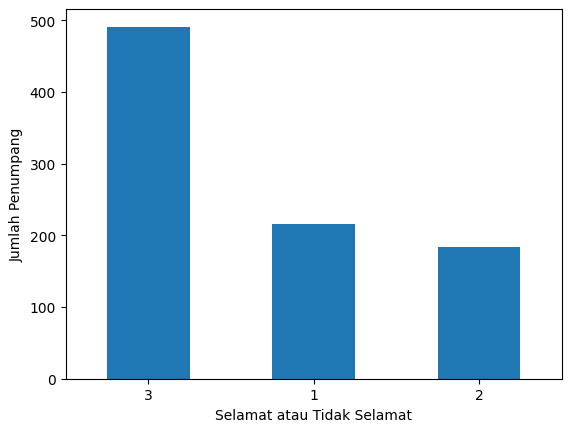

In [43]:
dt = train_data['Pclass'].value_counts()
plt = dt.plot(kind = 'bar', rot=0)
plt.set_xlabel('Selamat atau Tidak Selamat')
plt.set_ylabel('Jumlah Penumpang')

Text(0, 0.5, 'Jumlah Penumpang')

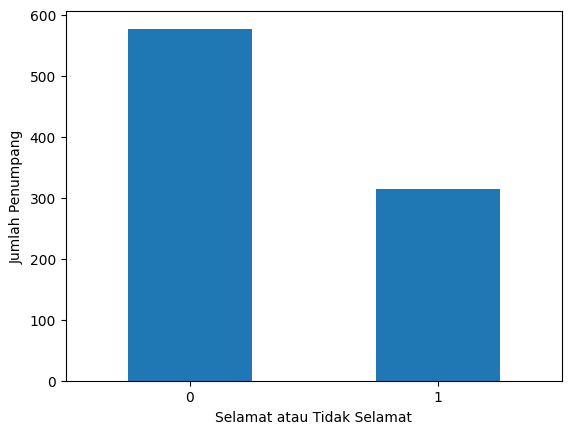

In [44]:
dt = train_data['Sex'].value_counts()
plt = dt.plot(kind = 'bar', rot=0)
plt.set_xlabel('Selamat atau Tidak Selamat')
plt.set_ylabel('Jumlah Penumpang')

Text(0, 0.5, 'Jumlah Penumpang')

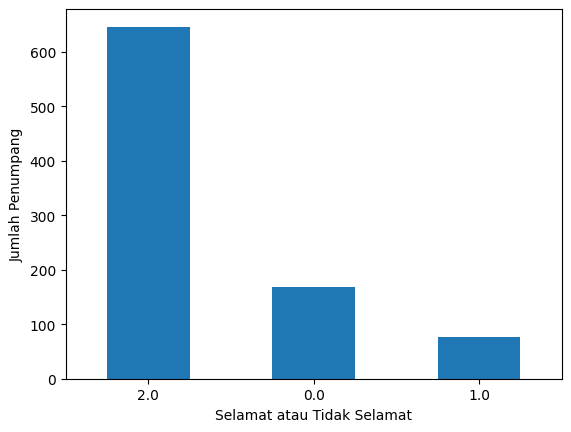

In [45]:
dt = train_data['Embarked'].value_counts()
plt = dt.plot(kind = 'bar', rot=0)
plt.set_xlabel('Selamat atau Tidak Selamat')
plt.set_ylabel('Jumlah Penumpang')

Text(0, 0.5, 'Probabilitas Selamat')

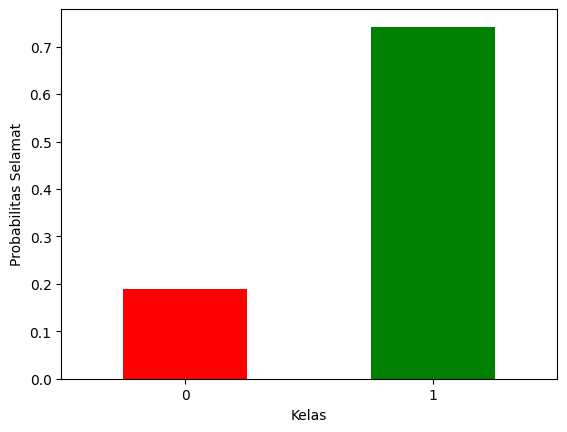

In [52]:
dt = train_data[['Sex', 'Survived']].groupby('Sex').mean().Survived
plt = dt.plot(kind='bar', rot=0, color=['red', 'green', 'blue'])
plt.set_xlabel('Kelas')
plt.set_ylabel('Probabilitas Selamat')

Text(0, 0.5, 'Probabilitas Selamat')

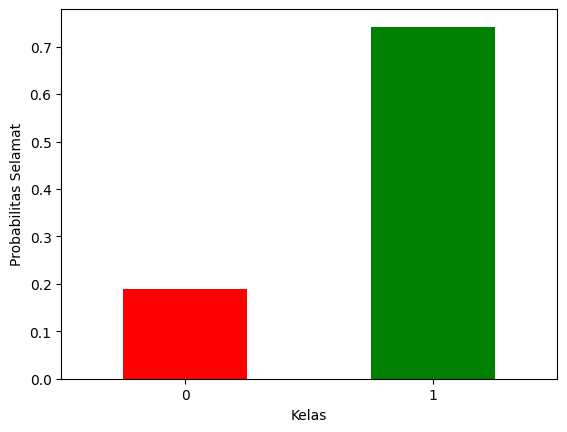

In [52]:
dt = train_data[['Sex', 'Survived']].groupby('Sex').mean().Survived
plt = dt.plot(kind='bar', rot=0, color=['red', 'green', 'blue'])
plt.set_xlabel('Kelas')
plt.set_ylabel('Probabilitas Selamat')

Text(0, 0.5, 'Probabilitas Selamat')

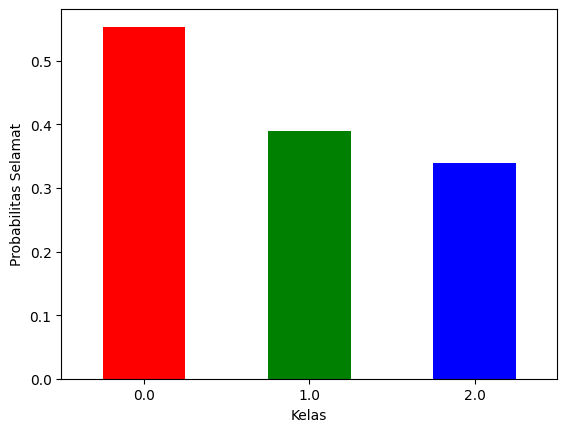

In [53]:
dt = train_data[['Embarked', 'Survived']].groupby('Embarked').mean().Survived
plt = dt.plot(kind='bar', rot=0, color=['red', 'green', 'blue'])
plt.set_xlabel('Kelas')
plt.set_ylabel('Probabilitas Selamat')

Text(0, 0.5, 'Probabilitas Selamat')

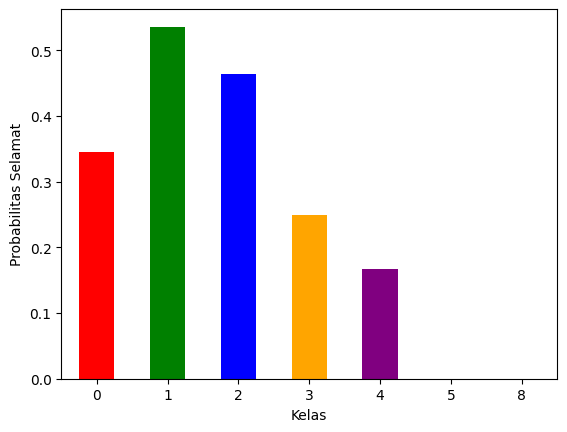

In [55]:
dt = train_data[['SibSp', 'Survived']].groupby('SibSp').mean().Survived
plt = dt.plot(kind='bar', rot=0, color=['red', 'green', 'blue', 'orange', 'purple'])
plt.set_xlabel('Kelas')
plt.set_ylabel('Probabilitas Selamat')

Text(0, 0.5, 'Probabilitas Selamat')

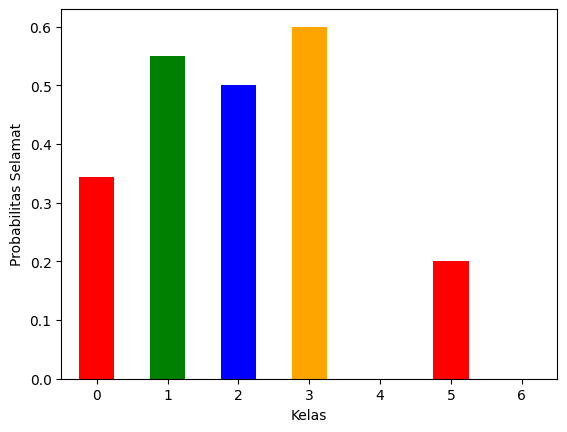

In [58]:
dt = train_data[['Parch', 'Survived']].groupby('Parch').mean().Survived
plt = dt.plot(kind='bar', rot=0, color=['red', 'green', 'blue', 'orange', 'purple'])
plt.set_xlabel('Kelas')
plt.set_ylabel('Probabilitas Selamat')

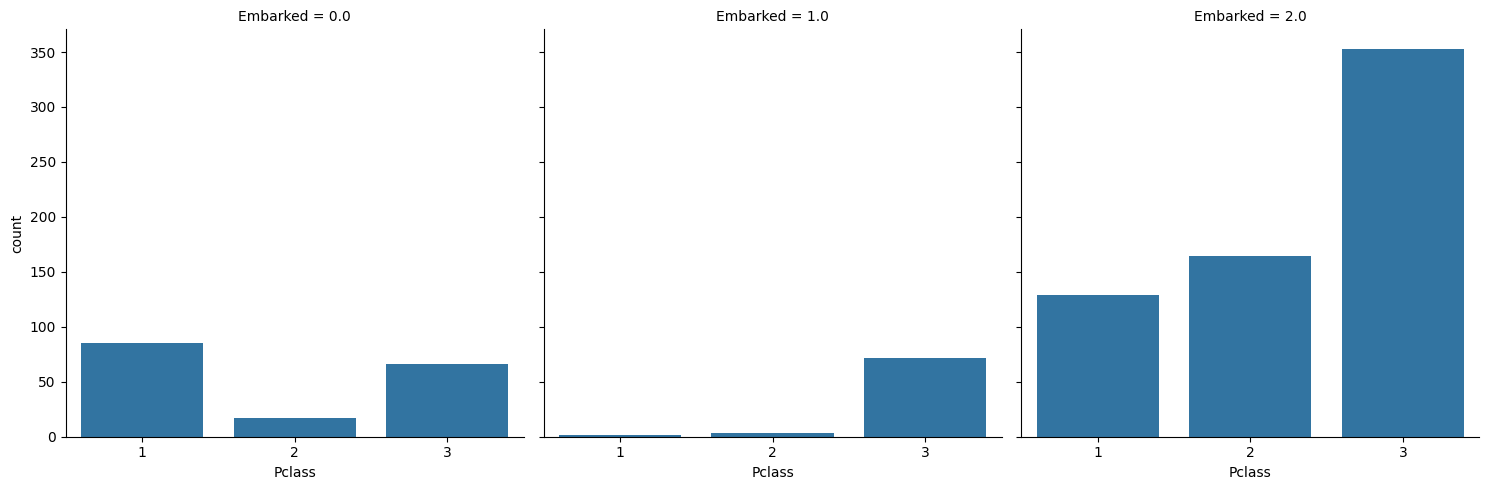

In [59]:
sns.catplot(x = 'Pclass', col = 'Embarked', data = train_data, kind = 'count')

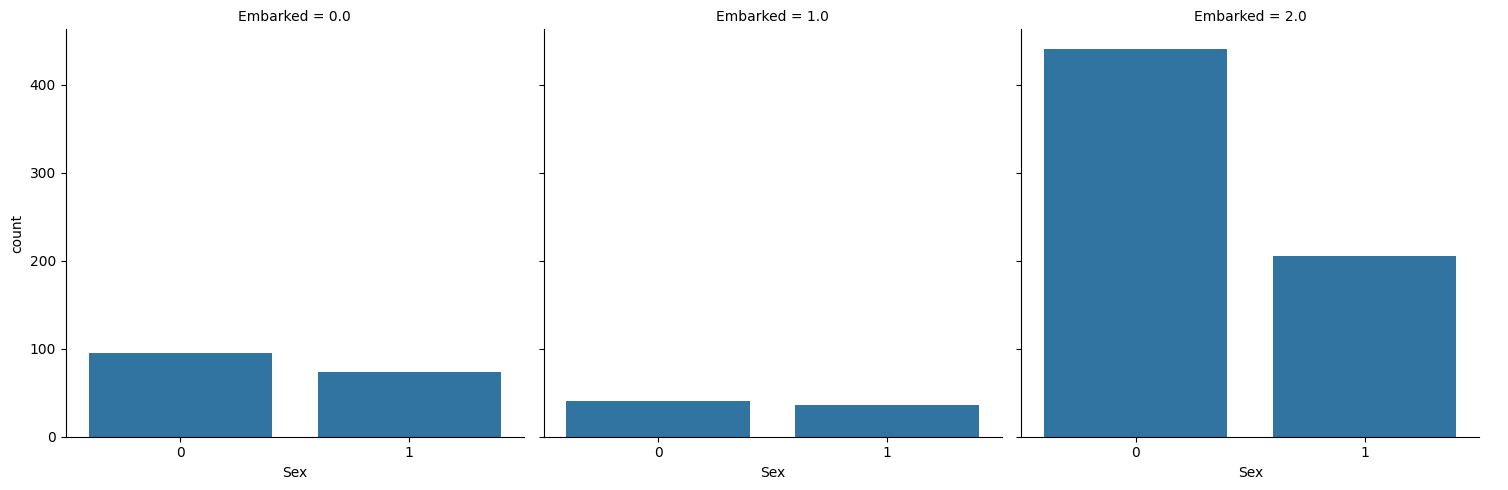

In [60]:
sns.catplot(x = 'Sex', col = 'Embarked', data = train_data, kind = 'count')

In [62]:
train_data['Title'] = train_data['Title'].replace('Master', '0')
train_data['Title'] = train_data['Title'].replace('Miss', '1')
train_data['Title'] = train_data['Title'].replace('Mr', '2')
train_data['Title'] = train_data['Title'].replace('Mrs', '3')
train_data['Title'] = train_data['Title'].replace('Others', '4')

Text(0, 0.5, 'Jumlah Penumpang')

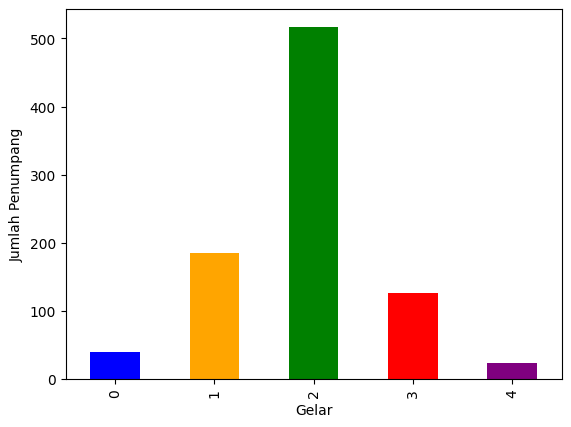

In [63]:
plt = train_data['Title'].value_counts().sort_index().plot(
    kind='bar', color=['blue', 'orange', 'green', 'red', 'purple'])
plt.set_xlabel('Gelar')
plt.set_ylabel('Jumlah Penumpang')

In [64]:
corr_matrix = train_data.corr()

<Axes: >

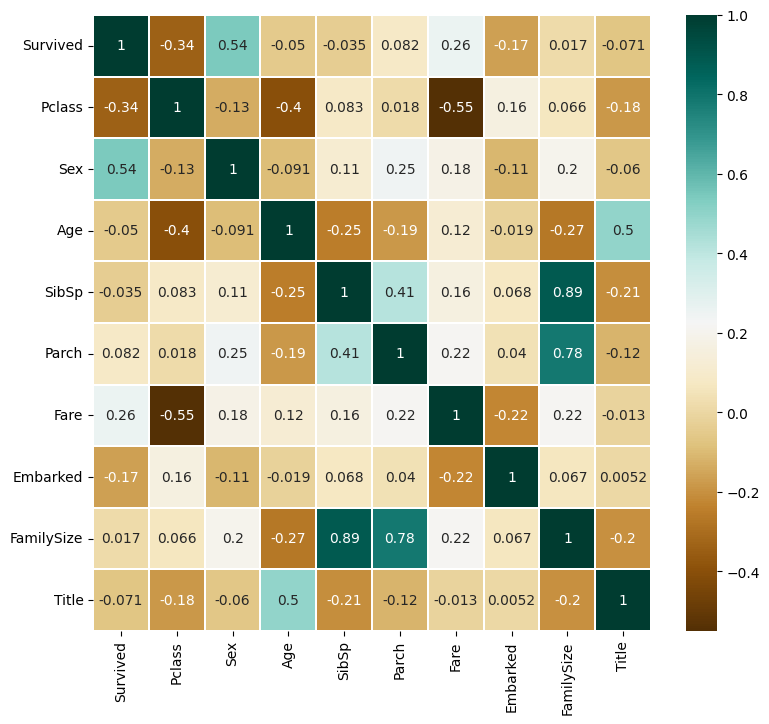

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,8))
sns.heatmap(data = corr_matrix, cmap='BrBG', annot=True, linewidths=0.2)